# wykonaj implementację funkcji plot_state_borders(), ale dla kraju innego niż USA,należy pamiętać o aktualizacji współrzędnych geograficznych  

## dane z pliku newCanada.txt zostały przekształcone z pliku states.json za pomoca skryptu KodDoWygenerowaniaDanychDlaKanady 

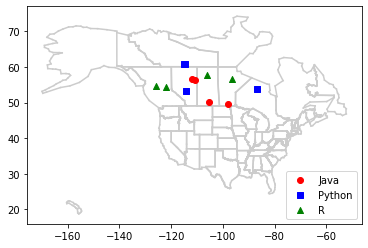

In [2]:
#potrzebne importy
from collections import Counter
import math, random
import matplotlib.pyplot as plt
import re
from linear_algebra import distance

#Część danych newCanada.txt
cities = [(-114.491928,60.792196,'Python'),(-114.997299,60.792196,'Python'),(-111.840279,56.712446,'Java'),(-110.653756,56.397591,'Java'),(-125.781929,54.701245,'R'),(-122.167427,54.324961,'R'),(-86.776228,53.859015,'Python'),(-114.161200,53.360807,'Python'),(-105.470372,50.234226, 'Java'),(-97.911778,49.526299, 'Java'),(-106.261387,57.611007, 'R'),(-96.373692,56.681296, 'R')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]


segments = []
points = []

lat_long_regex = "<point lat=\"(.*)\" lng=\"(.*)\""

#Otwórz plik a następnie, utwórz zmienną lines przechowujące wszystkie tagi 
with open("newCanada.txt", "r") as f:
    lines = [line for line in f]

#Dokonaj operacji regex pobierajać tylko ptrzebne dane
for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))
        

#funkcja do narysowanie granic państ
def plot_state_borders(plt, color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

#funkcja do klasyfikacji knn
def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)

def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels) #zlicz głosy to jest etykiety
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # zwróć unikalnego zwycięzce
    else:
        return majority_vote(labels[:-1]) # spróbuj ponownie bez ostatniego elementu

#kluczem jest zadany język a wartością jest para długości i szerokości geograficzne
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

#nadaj inne kolory i markery dla wszystkich języków
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

#Dla każdego języka/klucza dodaj punkt/value na "plocie"
for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

#utwórz scatter dla każdego języka
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=10)

plot_state_borders(plt)    #Narysuj krawędzie państwa

plt.legend(loc=0)          #Wybierz lokalizację
plt.show()

# Wymiar 1

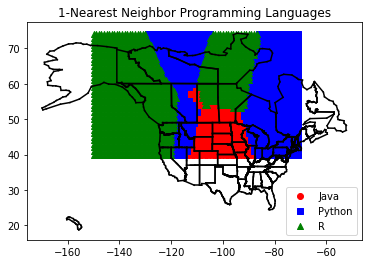

In [3]:
#Utwórz dane potrzebne do narysowania
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

#dla wymiaru pierwszego wymiaru oraz odpowidniej lokalizacji (range), Sklasyfikuj miasto (wraz z szerokością i długością)
k=1
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

#utwórz scatter dla każdego języka
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')  

plt.legend(loc=0)          
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

# Wymiar 2

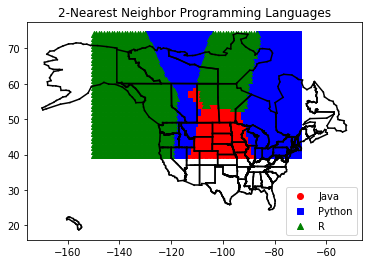

In [4]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=2
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

# Wymiar 3

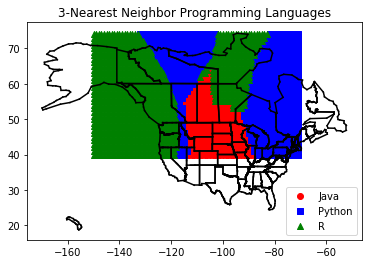

In [5]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=3
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

# Wymiar 4

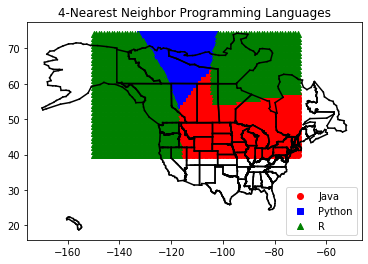

In [6]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=4
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

# Wymiar 5

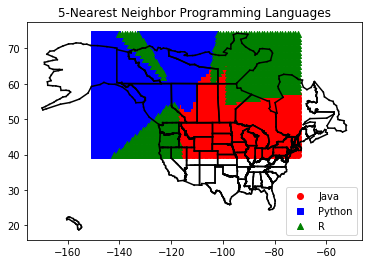

In [7]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=5
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

# Wymiar 6

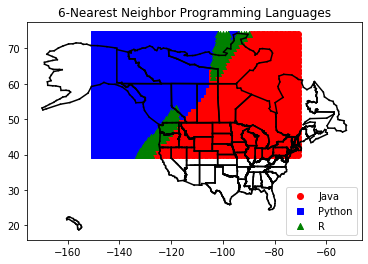

In [8]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=6
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

# Wymiar 7

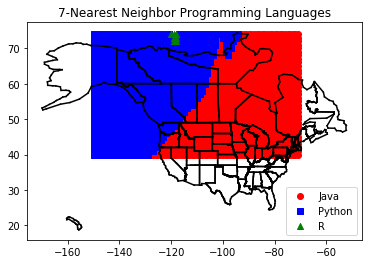

In [9]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=7
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

# Wymiar 8

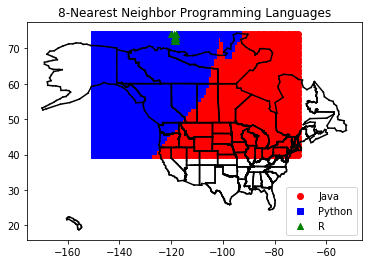

In [10]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=8
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

# Wymiar 9

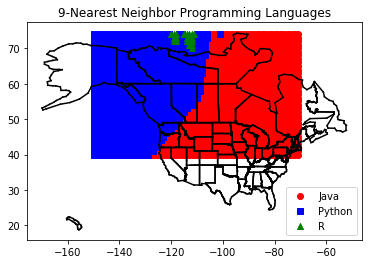

In [11]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=9
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

# Zadanie 2

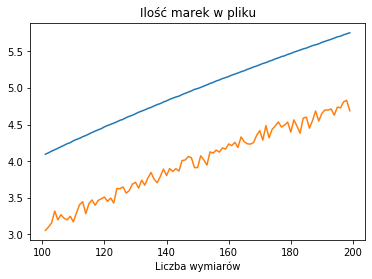

In [12]:
#Zaimportuj potrzebne bilbioteki
from stats import mean
import math, random
import matplotlib.pyplot as plt


#funkcje która dla zadanego wymiau zwrócą odległości między punktami
def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

#Dla wymiarów od 101 do 2000
dimensions = range(101, 200)


avg_distances = []
min_distances = []

random.seed(0)
#listy potrzebne do narysowania odległości
list1 = list()
list2 = list()
list3 = list()
list4 = list()

for dim in dimensions:
    distances = random_distances(dim, 20000)  # 20,000 losowych par
    avg_distances.append(mean(distances))     # Dodaj wartość średnią do listy
    min_distances.append(min(distances))      # Dodaj wartość minimalną do listy
    list1.append(dim)
    list2.append(mean(distances))
    list3.append(min(distances))
    
plt.plot(list1, list2,label="średnia odległość")
plt.xlabel('Liczba wymiarów')
plt.title('Ilość marek w pliku')
plt.plot(list1, list3,label="najmniejsza odległość")
plt.show()

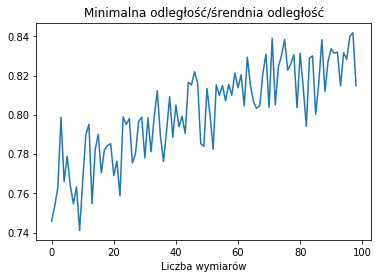

In [13]:
#Narysuj wykres minimalnej odległości średniej
min_avg_ratio = [min_dist / avg_dist for min_dist, avg_dist in zip(min_distances, avg_distances)]
plt.plot(min_avg_ratio)
plt.title('Minimalna odległość/śrendnia odległość')
plt.xlabel('Liczba wymiarów')
plt.show()

# Implementacje knn 

Text(0, 0.5, 'Testowanie precyzji')

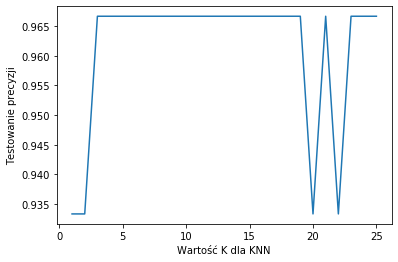

In [14]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

#Załaduj dane iris przypisz do x dane i do y target
iris = load_iris()
X = iris.data
y = iris.target

#podziel dane gdzie 80% to train a 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

#wymiary
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k) # Wykorzystaj algorytm k nearset
        knn.fit(X_train,y_train) #trenuj
        y_pred=knn.predict(X_test) #dokonaj predykcji 
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(k_range,scores_list) #Narysuj 
plt.xlabel('Wartość K dla KNN')
plt.ylabel('Testowanie precyzji') 

Wstępny wynik modelu: 
0.9666666666666667


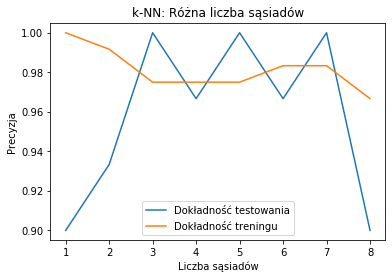

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split  

#Wykorzystaj plik
iris = pd.read_csv("iris.csv")
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
#podziel dane gdzie 80% to train a 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
knn = KNeighborsClassifier(n_neighbors=7)  
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

print("Wstępny wynik modelu: ")
print(knn.score(X_test,y_test))

no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # Tworzenie wystąpień klasyfikatora
    knn = KNeighborsClassifier(n_neighbors=k)
    # Trenuj
    knn.fit(X_train,y_train)
    
    # Oblicz dokładność na zestawie treningowym
    train_accuracy[i] = knn.score(X_train, y_train)

    # Oblicz dokładność na zestawie testowym
    test_accuracy[i] = knn.score(X_test, y_test)


plt.title('k-NN: Różna liczba sąsiadów')
plt.plot(no_neighbors, test_accuracy, label = 'Dokładność testowania')
plt.plot(no_neighbors, train_accuracy, label = 'Dokładność treningu')
plt.legend()
plt.xlabel('Liczba sąsiadów')
plt.ylabel('Precyzja')
plt.show()